In [1]:
!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"

--2021-02-06 18:59:56--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 173.222.228.51, 2600:1409:12:2af::e59, 2600:1409:12:285::e59
Connecting to download.microsoft.com (download.microsoft.com)|173.222.228.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   209MB/s    in 4.3s    

2021-02-06 19:00:01 (185 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [2]:
!unzip -q "/content/kagglecatsanddogs_3367a.zip"

In [3]:
!ls "PetImages/"

Cat  Dog


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib 
import os
from tqdm import tqdm 

In [5]:
# Number of Dog images 
len(os.listdir("PetImages/Dog"))

12501

In [6]:
# Number of Cat images 
len(os.listdir("PetImages/Cat"))

12501

In [7]:
DataPath = pathlib.Path("PetImages")
all_paths = DataPath.glob("*/*.jpg")
all_paths

<generator object Path.glob at 0x7fa896753e60>

In [8]:
all_paths = list(all_paths)
all_paths[:10]

[PosixPath('PetImages/Dog/407.jpg'),
 PosixPath('PetImages/Dog/2411.jpg'),
 PosixPath('PetImages/Dog/12476.jpg'),
 PosixPath('PetImages/Dog/5831.jpg'),
 PosixPath('PetImages/Dog/7544.jpg'),
 PosixPath('PetImages/Dog/394.jpg'),
 PosixPath('PetImages/Dog/8745.jpg'),
 PosixPath('PetImages/Dog/5517.jpg'),
 PosixPath('PetImages/Dog/1921.jpg'),
 PosixPath('PetImages/Dog/1591.jpg')]

In [9]:
all_paths = list(map(lambda x : str(x) , all_paths))
all_paths[:10]

['PetImages/Dog/407.jpg',
 'PetImages/Dog/2411.jpg',
 'PetImages/Dog/12476.jpg',
 'PetImages/Dog/5831.jpg',
 'PetImages/Dog/7544.jpg',
 'PetImages/Dog/394.jpg',
 'PetImages/Dog/8745.jpg',
 'PetImages/Dog/5517.jpg',
 'PetImages/Dog/1921.jpg',
 'PetImages/Dog/1591.jpg']

In [10]:
from random import shuffle

shuffle(all_paths)
all_paths[:10]

['PetImages/Dog/1122.jpg',
 'PetImages/Dog/12039.jpg',
 'PetImages/Cat/92.jpg',
 'PetImages/Cat/2852.jpg',
 'PetImages/Cat/5593.jpg',
 'PetImages/Dog/7216.jpg',
 'PetImages/Dog/1416.jpg',
 'PetImages/Dog/7251.jpg',
 'PetImages/Cat/38.jpg',
 'PetImages/Dog/5440.jpg']

In [11]:
def TestImageQuality(all_paths):
    new_all_paths = []
    for path in tqdm(all_paths):
        try :
            image = tf.io.read_file(path)
            image = tf.io.decode_jpeg(image , channels = 3)
        except :
            continue
        new_all_paths.append(path)
    return new_all_paths

all_paths = TestImageQuality(all_paths)
all_paths[:10]

100%|██████████| 25000/25000 [00:37<00:00, 665.40it/s]


['PetImages/Dog/1122.jpg',
 'PetImages/Dog/12039.jpg',
 'PetImages/Cat/92.jpg',
 'PetImages/Cat/2852.jpg',
 'PetImages/Cat/5593.jpg',
 'PetImages/Dog/7216.jpg',
 'PetImages/Dog/1416.jpg',
 'PetImages/Dog/7251.jpg',
 'PetImages/Cat/38.jpg',
 'PetImages/Dog/5440.jpg']

In [12]:
# Getting their respective labels 
def get_label(image_path):
    return image_path.split("/")[-2]

all_labels = list(map(lambda x : get_label(x) , all_paths))
all_labels[:10]

['Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Cat', 'Dog']

In [13]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)

all_labels[:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [14]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(all_paths , all_labels)

In [15]:
Train_paths[:10] , Train_labels[:10]

(['PetImages/Dog/4886.jpg',
  'PetImages/Cat/1501.jpg',
  'PetImages/Cat/6915.jpg',
  'PetImages/Dog/3595.jpg',
  'PetImages/Dog/59.jpg',
  'PetImages/Dog/3309.jpg',
  'PetImages/Cat/11110.jpg',
  'PetImages/Dog/10756.jpg',
  'PetImages/Cat/11287.jpg',
  'PetImages/Cat/9186.jpg'],
 array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0]))

In [16]:
# Function used to decode jpeg into Tensor

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [17]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 224 
BATCH_SIZE = 128

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [18]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    return dataset

In [19]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 380 ms, sys: 5.91 ms, total: 386 ms
Wall time: 407 ms
(128, 224, 224, 3)
(128,)


Cat


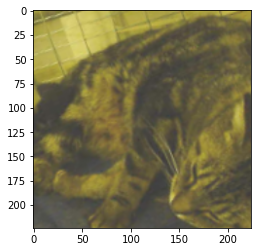

In [20]:
# View a sample Training Image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [21]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 19.5 ms, sys: 0 ns, total: 19.5 ms
Wall time: 30.5 ms
(128, 224, 224, 3)
(128,)


Cat


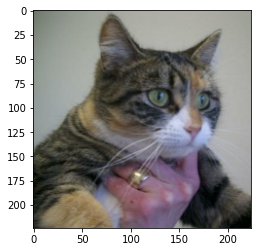

In [22]:
# View a sample Training Image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [23]:
# Building ResNet50 model
from tensorflow.keras.applications import InceptionV3

backbone = InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

87916544/87910968 [==============================] - 1s 0us/step


In [24]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 21,804,833
Trainable params: 21,770,401
Non-trainable params: 34,432
_________________________________________________________________
None


In [25]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/10
145/145 [==============================] - 223s 1s/step - loss: 0.2551 - accuracy: 0.8885 - val_loss: 0.7555 - val_accuracy: 0.7218
Epoch 2/10
145/145 [==============================] - 214s 1s/step - loss: 0.1223 - accuracy: 0.9521 - val_loss: 0.3784 - val_accuracy: 0.7894
Epoch 3/10
145/145 [==============================] - 215s 1s/step - loss: 0.0948 - accuracy: 0.9623 - val_loss: 0.2526 - val_accuracy: 0.9159
Epoch 4/10
145/145 [==============================] - 216s 1s/step - loss: 0.0898 - accuracy: 0.9655 - val_loss: 0.4388 - val_accuracy: 0.7887
Epoch 5/10
145/145 [==============================] - 216s 1s/step - loss: 0.0811 - accuracy: 0.9674 - val_loss: 0.3195 - val_accuracy: 0.8903
Epoch 6/10
145/145 [==============================] - ETA: 0s - loss: 0.0855 - accuracy: 0.9663

In [ ]:
# Evaluating the loaded model
loss, acc = model.evaluate(val_dataset)

print(" Testing Acc : " , acc)
print(" Testing Loss : " , loss)